In [87]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Matrix

In [88]:
kap = 0.05
mu = [0,0,0,0.35,0.625,0.63,0.448,0.434]
Delta=np.arange(-0.3,0.301,0.01)
t=1e-5

In [89]:
def cgc(j1,j2,j,m1,m2):
    m=m1+m2
    if (j<=j1+j2 and j>=abs(j1-j2) and abs(m)<=abs(j) and abs(m1)<=abs(j1) and abs(m2)<=abs(j2)):
        k=0
        sum=0.0
    
        cbcoeff=math.sqrt(((2*j+1)*math.factorial(int(j+j1-j2))*math.factorial(int(j-j1+j2))*math.factorial(int(j1+j2-j)))/math.factorial(int(j1+j2+j+1)))
        cbcoeff=cbcoeff*math.sqrt(math.factorial(int(j+m))*math.factorial(int(j-m))*math.factorial(int(j1-m1))*math.factorial(int(j1+m1))*math.factorial(int(j2-m2))*math.factorial(int(j2+m2)))
        
        for k in np.arange(max(-j+j2-m1,j1+m2-j,0),min(j1+j2-j,j1-m1,j2+m2)+1,1):
            sum=sum+math.pow((-1),k)*(math.pow(math.factorial(int(k))*math.factorial(int(j1+j2-j-k))*math.factorial(int(j1-m1-k))*math.factorial(int(j2+m2-k))*math.factorial(int(j-j2+m1+k))*math.factorial(int(j-j1-m2+k)),-1))
        
        return sum*cbcoeff
    else:
        return 0

In [90]:
def diag(H,nbas):
    diagH = []
    diagHs = []
    eig = []
    for i in range (len(H)):
        P, diag = Matrix(H[i]).diagonalize()
        diagH.append(np.diagonal(diag))
        diagHs.append(sorted(np.diagonal(diag).tolist()))
        eig.append(np.array(P).tolist())

        for j in range(len(diagHs[-1])):
            val1 = diagHs[-1][j]
            for k in range (len(diagH[-1])): 
                val2 = diagH[-1][k]
                if val1==val2:
                    for l in range(nbas):
                        eig[-1][l][j] = np.array(P)[l][k]
                else:
                    continue
    diagH = np.array(diagH)
    diagHs = np.array(diagHs)
    eig = np.array(eig)
    return diagHs,eig

In [91]:
def nilsson(N,om):
    l_list=[]
    lam_list=[]
    sig_list=[]
    j_list=[]
    H=[]
    t=0.001
    for l in range(N,-1,-2):
        for lam in range(-l,l+1):
            sig = om - lam
            if (abs(abs(sig)-0.5)<t):
                l_list.append(l)
                lam_list.append(lam)
                sig_list.append(om-lam)
                j_list.append(l+sig)
    nbas=len(l_list)
    for delta in Delta:
        H.append([])
        fdel = ((((1+(2*delta/3))**2)*(1-(4*delta/3)))**(-1/6))
        hw0 = 1
        hw00 = hw0/fdel
        C=-2*kap*hw00
        D=mu[N]*C/2.0
        for i in range(nbas):
            H[-1].append([])
            li=l_list[i]
            lami=lam_list[i]
            sigi=sig_list[i] 
            for j in range(nbas):
                lj=l_list[j]
                lamj=lam_list[j]
                sigj=sig_list[j] 

                if (i==j):
                    h00 = (N+1.5)*hw0
                    hl2 = D*lj*(lj+1)
                    hls = C*lamj*sigj
                    hr2 = N+1.5
                else:
                    h00=0.0
                    hl2=0.0

                if(abs(li-lj)<t):
                    if ((abs(lami-lamj-1))<=t and abs(sigi-sigj+1)<=t):
                        hls = C*0.5*np.sqrt((lj-lamj)*(lj+lamj+1))
                    elif ((abs(lami-lamj+1))<=t and abs(sigi-sigj-1)<=t):
                        hls = C*0.5*np.sqrt((lj+lamj)*(lj-lamj+1))
                else:
                    hls = 0
                if (abs(lami-lamj)<t) and (abs(sigi-sigj)<t):
                    hY0=cgc(lj,2,li,lamj,0)*cgc(lj,2,li,0,0)*np.sqrt((2*lj+1)/(2*li+1))
                    if abs(li-lj+2)<t:
                        hr2 = np.sqrt((N-lj+2)*(N+lj+1))
                    elif abs(li-lj-2)<t:
                        hr2 = np.sqrt((N-lj)*(N+lj+3))
                else:
                    hr2=0
                    hY0=0
                hdelta = -delta*hw0*(2/3)*hr2*hY0
                H[-1][-1].append(h00+hdelta+hls+hl2)    
    L,P = diag(H,nbas)
    return L, P, nbas,l_list,lam_list,sig_list,j_list

(2.0, 5.0)

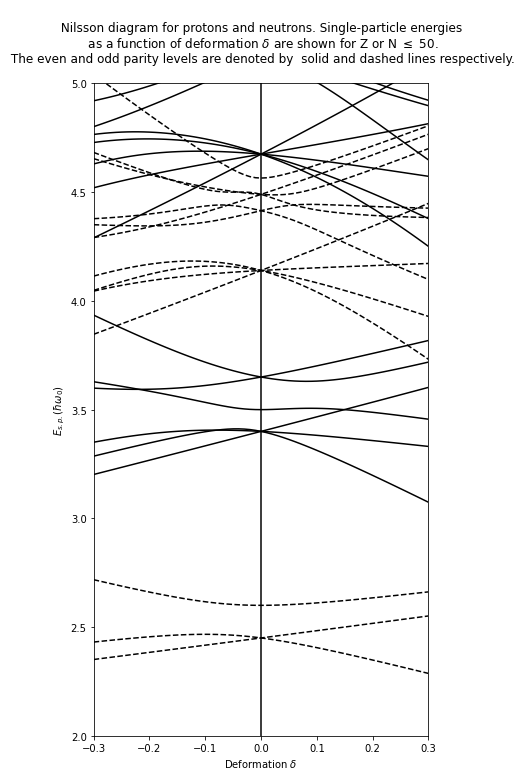

In [92]:
Ntotal = 8
plt.figure(figsize=(6,12))
for N in range(0,Ntotal+1,2):
    for omega in range(1,N+2,2):
        if (N/2)%2==0:
            H_all,P,nbass = nilsson(int(N/2),omega/2)[0:3]
            for i in range(nbass):
                plt.plot(Delta,H_all[:,i],color='k')
        else:
            H_all,P,nbass = nilsson(int(N/2),omega/2)[0:3]
            for i in range(nbass):
                plt.plot(Delta,H_all[:,i],color='k',linestyle = 'dashed')
plt.title("\n Nilsson diagram for protons and neutrons. Single-particle energies \n as a function of deformation $\delta$ are shown for Z or N $\leq$ 50.\n The even and odd parity levels are denoted by  solid and dashed lines respectively.\n")
plt.ylabel('$E_{s.p.}(\hbar\omega_0)$')
plt.xlabel('Deformation $\delta$')
plt.axvline(0,color='k')
plt.xlim(-0.3,0.3)
plt.ylim(2,5)

Text(0.5, 0, 'Deformation $\\delta$')

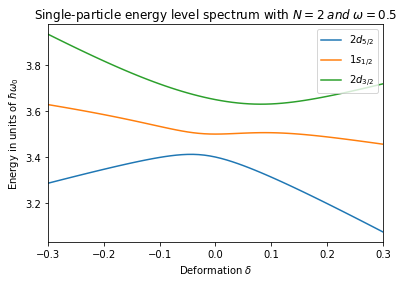

In [93]:
DiagHs,eig,nbas,l_list,lam_list,sig_list,j_list = nilsson(2,0.5)
legend = ['$2d_{5/2}$','$1s_{1/2}$','$2d_{3/2}$']
for i in range(len(l_list)):
    y = DiagHs[:,i].tolist()
    plt.plot(Delta, y, label=legend[i])
plt.xlim(-0.3,0.3)
plt.legend(loc='upper right')
plt.title('Single-particle energy level spectrum with $N = 2 \; and \; \omega = 0.5$')
plt.ylabel('Energy in units of $\hbar\omega_{0}$')
plt.xlabel('Deformation $\delta$')

In [94]:
a = []
for i in range (len(eig)):
    a.append([])
    for k in range(nbas):
        a[-1].append([])
        l = l_list[k]
        j = j_list[k]
        for m in range(nbas):
            psi = eig[i][:,m]
            sum = 0
            for n in range(nbas):
                if (l_list[n]==l):
                    sum = sum + cgc(l, 0.5, j, lam_list[n], sig_list[n])*psi[n]
                else:
                    continue
            a[-1][-1].append(sum*sum)
a = np.array(a)

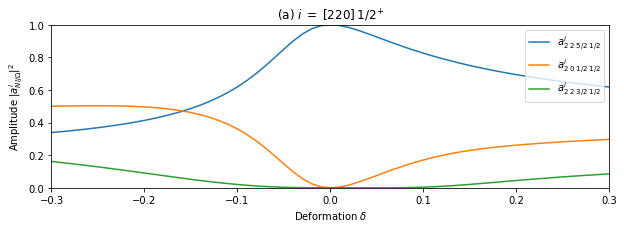

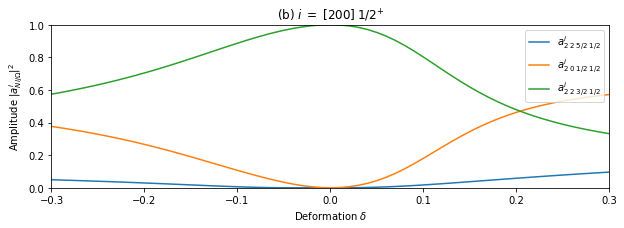

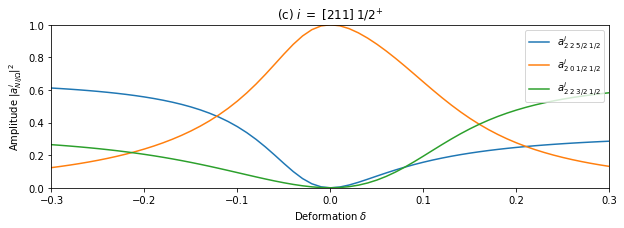

In [95]:
# Plotting amplitudes
titles = ['(a) $i\;=\;[220]\:1/2^{+}$','(b) $i\;=\;[200]\:1/2^{+}$','(c) $i\;=\;[211]\:1/2^{+}$']
legend = ['$a^{i}_{2\;2\;5/2\;1/2}$','$a^{i}_{2\;0\;1/2\;1/2}$','$a^{i}_{2\;2\;3/2\;1/2}$']
for i in range(nbas):
    plt.figure(figsize=(10,3))
    ax = plt.gca()
    ax.set_xlim([-0.4, 0.4])
    plt.xlim(-0.3,0.3)
    plt.ylim(0,1)
    for j in range(nbas):
        y = []
        for k in range (len(a)):
            y.append(a[k][i][j])
        plt.plot(Delta, y, label=legend[j])
    plt.title(titles[i])
    plt.legend(loc='upper right')
    plt.ylabel('Amplitude $|a^{i}_{Nlj\Omega}|^2$')
    plt.xlabel('Deformation $\delta$')
    plt.show()
